In [159]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

In [160]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'data/magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [161]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X=minmax_scale.fit_transform(X) 
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

15216

In [162]:
test_Features[:2]

array([[0.07842652, 0.07082127, 0.22247191, 0.52574156, 0.43295303,
        0.45434885, 0.62872386, 0.55823979, 0.1975    , 0.22453419],
       [0.06903016, 0.05257467, 0.19949734, 0.52994658, 0.4246555 ,
        0.43582697, 0.54674242, 0.50826983, 0.16502222, 0.34475793]])

In [163]:
train_Label[:4]

array([1, 1, 0, 1])

In [164]:
train_Features.shape

(15216, 10)

In [165]:
test_Label[:4]

array([1, 1, 1, 0])

In [166]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [167]:
model = Sequential()

In [168]:
model.add(Embedding(input_dim=10,output_dim=1))

In [169]:
model.add(SimpleRNN(units=10))

In [170]:
model.add(Dense(1, activation = "sigmoid"))

In [171]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 1)           10        
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [173]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=300,verbose=2)

Train on 12172 samples, validate on 3044 samples
Epoch 1/30
 - 1s - loss: 0.6684 - acc: 0.6435 - val_loss: 0.6434 - val_acc: 0.6570
Epoch 2/30
 - 0s - loss: 0.6515 - acc: 0.6435 - val_loss: 0.6431 - val_acc: 0.6570
Epoch 3/30
 - 0s - loss: 0.6514 - acc: 0.6435 - val_loss: 0.6440 - val_acc: 0.6570
Epoch 4/30
 - 0s - loss: 0.6517 - acc: 0.6435 - val_loss: 0.6441 - val_acc: 0.6570
Epoch 5/30
 - 0s - loss: 0.6516 - acc: 0.6435 - val_loss: 0.6433 - val_acc: 0.6570
Epoch 6/30
 - 0s - loss: 0.6515 - acc: 0.6435 - val_loss: 0.6438 - val_acc: 0.6570
Epoch 7/30
 - 0s - loss: 0.6515 - acc: 0.6435 - val_loss: 0.6440 - val_acc: 0.6570
Epoch 8/30
 - 1s - loss: 0.6515 - acc: 0.6435 - val_loss: 0.6431 - val_acc: 0.6570
Epoch 9/30
 - 1s - loss: 0.6514 - acc: 0.6435 - val_loss: 0.6439 - val_acc: 0.6570
Epoch 10/30
 - 1s - loss: 0.6514 - acc: 0.6435 - val_loss: 0.6430 - val_acc: 0.6570
Epoch 11/30
 - 1s - loss: 0.6515 - acc: 0.6435 - val_loss: 0.6430 - val_acc: 0.6570
Epoch 12/30
 - 1s - loss: 0.6514 - a

In [174]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

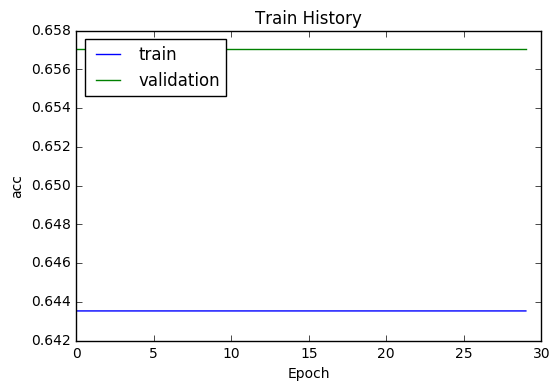

In [175]:
show_train_history(train_history,'acc','val_acc')

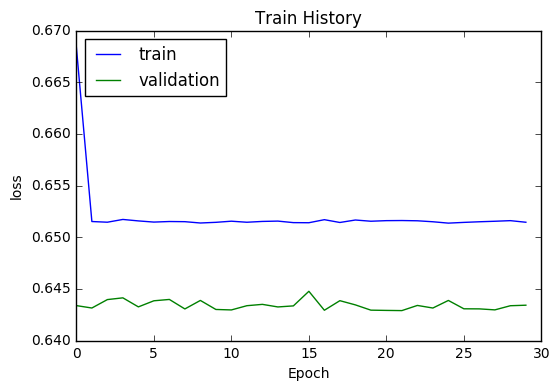

In [176]:
show_train_history(train_history,'loss','val_loss')

In [177]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 1s 260us/step


In [178]:
scores[1]

0.656940062997469